# Week 7 Assignment: Normalization, Standardization, Initialization, optimization

-------

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
URL = './heart.csv'
raw_df = pd.read_csv(URL)
raw_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Dataset

클리블랜드(Cleveland) 심장병 재단에서 제공한 작은 [데이터셋](https://archive.ics.uci.edu/ml/datasets/heart+Disease)을 사용하겠습니다. 이 CSV 파일은 수백 개의 행으로 이루어져 있습니다. 각 행은 환자 한 명을 나타내고 각 열은 환자에 대한 속성 값입니다. 이 정보를 사용해 환자의 심장병 발병 여부를 예측해 보겠습니다. 즉 이 데이터셋은 이진 분류 문제입니다.

다음은 이 데이터셋에 대한 [설명](https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/heart-disease.names)입니다. 수치형과 범주형 열이 모두 있다는 점을 주목하세요.

>열| 설명| 특성 타입 | 데이터 타입
>------------|--------------------|----------------------|-----------------
>Age | 나이 | 수치형 | 정수
>Sex | (1 = 남성; 0 = 여성) | 범주형 | 정수
>CP | 가슴 통증 유형 (0, 1, 2, 3, 4) | 범주형 | 정수
>Trestbpd | 안정 혈압 (병원 입원시 mm Hg) | 수치형 | 정수
>Chol | 혈청 콜레스테롤 (mg/dl) | 수치형 | 정수
>FBS | (공복 혈당 > 120 mg/dl) (1 = true; 0 = false) | 범주형 | 정수
>RestECG | 안정 심전도 결과 (0, 1, 2) | 범주형 | 정수
>Thalach | 최대 심박동수 | 수치형 | 정수
>Exang | 협심증 유발 운동 (1 = yes; 0 = no) | 범주형 | 정수
>Oldpeak | 비교적 안정되기까지 운동으로 유발되는 ST depression | 수치형 | 정수
>Slope | 최대 운동 ST segment의 기울기 | 수치형 | 실수
>CA | 형광 투시된 주요 혈관의 수 (0-3) | 수치형 | 정수
>Thal | 3 = 보통; 6 = 해결된 결함; 7 = 해결가능한 결함 | 범주형 | 문자열
>Target | 심장병 진단 (1 = true; 0 = false) | 분류 | 정수

Thal은 제외하고 진행합니다.

In [3]:
raw_df.drop(columns='thal')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,0


-------

## <font color="blue"> Question 1
    
**문제:** 해당 data의 feature 중 'age','trestbps','chol','thalach','oldpeak'를 StandardScaler로 standardization 하시오.
    
**소문제 1:** StandardScaler를 import하기
    
**소문제 2:** StandardScaler를 인스턴스하기
    
**소문제 3:** StandardScaler를 standardization하고 저장하기 (StandardScaler의 어떤 메서드를 사용해야 한다.)

In [4]:
x_raw1 = raw_df.loc[:,['age','trestbps','chol','thalach','oldpeak']]
x_raw1

,age,trestbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6
...,...,...,...,...,...
298,57,140,241,123,0.2
299,45,110,264,132,1.2
300,68,144,193,141,3.4
301,57,130,131,115,1.2


**소문제 1:** StandardScaler를 import하기

In [5]:
### START CODE HERE ### (≈ 1 line of code)
from sklearn.preprocessing import StandardScaler
### END CODE HERE ###

**소문제 2:** StandardScaler를 인스턴스하기

In [6]:
### START CODE HERE ### (≈ 1 line of code)
sds = StandardScaler()
### END CODE HERE ###

**소문제 3:** StandardScaler를 standardization하고 저장하기 (StandardScaler의 어떤 메서드를 사용해야 한다.)

In [9]:
### START CODE HERE ### (≈ 1 line of code) (2줄로 만들어도 괜찮습니다.)
x1 = sds.fit_transform(x_raw1)
### END CODE HERE ###

In [10]:
# 해당 셀이 실행되어야 정답

assert(x1[0][0] == 0.9521966015692286)
assert(x1[3][3] == 1.2398969233511221)

------

>열| 설명| 특성 타입 | 데이터 타입
>------------|--------------------|----------------------|-----------------
>Age | 나이 | 수치형 | 정수
>Sex | (1 = 남성; 0 = 여성) | 범주형 | 정수
>CP | 가슴 통증 유형 (0, 1, 2, 3, 4) | 범주형 | 정수
>Trestbpd | 안정 혈압 (병원 입원시 mm Hg) | 수치형 | 정수
>Chol | 혈청 콜레스테롤 (mg/dl) | 수치형 | 정수
>FBS | (공복 혈당 > 120 mg/dl) (1 = true; 0 = false) | 범주형 | 정수
>RestECG | 안정 심전도 결과 (0, 1, 2) | 범주형 | 정수
>Thalach | 최대 심박동수 | 수치형 | 정수
>Exang | 협심증 유발 운동 (1 = yes; 0 = no) | 범주형 | 정수
>Oldpeak | 비교적 안정되기까지 운동으로 유발되는 ST depression | 수치형 | 정수
>Slope | 최대 운동 ST segment의 기울기 | 수치형 | 실수
>CA | 형광 투시된 주요 혈관의 수 (0-3) | 수치형 | 정수
>Thal | 3 = 보통; 6 = 해결된 결함; 7 = 해결가능한 결함 | 범주형 | 문자열
>Target | 심장병 진단 (1 = true; 0 = false) | 분류 | 정수

---------

## <font color="blue"> Question 2
    
**문제:** 해당 data의 feature 중 'cp', 'restecg', 'slope', 'ca'를 MinMaxScaler로 normalize (0과 1사이로 minmaxscaling)하시오.
    

In [11]:
x_raw2 = raw_df.loc[:,['cp', 'restecg', 'slope', 'ca']]
x_raw2

,cp,restecg,slope,ca
0,3,0,0,0
1,2,1,0,0
2,1,0,2,0
3,1,1,2,0
4,0,1,2,0
...,...,...,...,...
298,0,1,1,0
299,3,1,1,0
300,0,1,1,2
301,0,1,1,1


In [12]:
### START CODE HERE ### (≈ 3 line of code) (4줄로 적어도 됩니다.)
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
x2 = mm.fit_transform(x_raw2)
### END CODE HERE ###

In [13]:
# 해당 셀이 정상적으로 실행되어야 정답입니다.

assert(np.array(x2[10] == [1. , 0. , 0.5, 0. ]).all)
assert(np.array(x2[100] == [1. , 1. , 0.5, 0. ]).all)

--------

12개 feature를 이제 하나로 합치고 label(y)도 확보해본다.

In [14]:
x1 = pd.DataFrame(x1, columns=['age', 'trestbps','chol', 'thalach', 'oldpeak'])
x2 = pd.DataFrame(x2, columns=['cp', 'restecg', 'slope','ca'])
x3 = raw_df.loc[:,['exang', 'sex', 'fbs']]
y = raw_df.target

In [15]:
x = x1.join(x2)
x

,age,trestbps,chol,thalach,oldpeak,cp,restecg,slope,ca
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1.000000,0.0,0.0,0.00
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,0.666667,0.5,0.0,0.00
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,0.333333,0.0,1.0,0.00
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,0.333333,0.5,1.0,0.00
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,0.000000,0.5,1.0,0.00
...,...,...,...,...,...,...,...,...,...
298,0.290464,0.478391,-0.101730,-1.165281,-0.724323,0.000000,0.5,0.5,0.00
299,-1.033002,-1.234996,0.342756,-0.771706,0.138373,1.000000,0.5,0.5,0.00
300,1.503641,0.706843,-1.029353,-0.378132,2.036303,0.000000,0.5,0.5,0.50
301,0.290464,-0.092738,-2.227533,-1.515125,0.138373,0.000000,0.5,0.5,0.25


In [16]:
x = x.join(x3)
x

,age,trestbps,chol,thalach,oldpeak,cp,restecg,slope,ca,exang,sex,fbs
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1.000000,0.0,0.0,0.00,0,1,1
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,0.666667,0.5,0.0,0.00,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,0.333333,0.0,1.0,0.00,0,0,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,0.333333,0.5,1.0,0.00,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,0.000000,0.5,1.0,0.00,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0.478391,-0.101730,-1.165281,-0.724323,0.000000,0.5,0.5,0.00,1,0,0
299,-1.033002,-1.234996,0.342756,-0.771706,0.138373,1.000000,0.5,0.5,0.00,0,1,0
300,1.503641,0.706843,-1.029353,-0.378132,2.036303,0.000000,0.5,0.5,0.50,0,1,1
301,0.290464,-0.092738,-2.227533,-1.515125,0.138373,0.000000,0.5,0.5,0.25,1,1,0


-------

## <font color="blue"> Question 3
    
**문제:** momentum optimizer를 learning rate는 0.001, momentum은 0.9로 설정해서 학습해 보시오.
 (마지막 layer와 input_dim 설정까지 그동안 배운 지식으로 해보기 바랍니다.) (현재 binary classification입니다.)
    
**소문제 1:** 사용할 optimizer import
    
**소문제 2:** momentum optimizer를 learning rate는 0.001, momentum은 0.9로 설정해서 만들기
    
**소문제 3:** 조건에 맞는 모델 만들기 해당 함수를 만드시오.

(1> input_dim 설정 2> binary classification에 맞는 output layer의 2가지 설정 3> loss 설정)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

**소문제 1:** 사용할 optimizer import

In [18]:
### START CODE HERE ### (≈ 1 line of code)
from tensorflow.keras.optimizers import SGD
### END CODE HERE ###

**소문제 2:** momentum optimizer를 learning rate는 0.001, momentum은 0.9로 설정해서 만들기

In [19]:
### START CODE HERE ### (≈ 1 line of code)
sgd = SGD(learning_rate=0.001, momentum=0.9, nesterov=False)
### END CODE HERE ###

**소문제 3:** 조건에 맞는 모델 만들기 해당 함수를 만드시오.

(1> input_dim 설정 2> binary classification에 맞는 output layer의 2가지 설정 3> loss 설정)

In [20]:
def create_momentum_model():
    model = Sequential()
    ### START CODE HERE ### (≈ 1 line of code)
    model.add(Dense(units = 32, input_dim = 12, activation='relu'))
    ### END CODE HERE ###
    
    model.add(Dense(64, activation = 'relu'))
    
    ### START CODE HERE ### (≈ 1 line of code)
    model.add(Dense(units = 1, activation = 'sigmoid'))
    ### END CODE HERE ###
    
    ### START CODE HERE ### (≈ 1 line of code)
    model.compile(optimizer = sgd, metrics = ['accuracy'], loss="binary_crossentropy")
    ### END CODE HERE ###
    
    return model

In [21]:
model = create_momentum_model()

In [22]:
history = model.fit(np.array(x),np.array(y),epochs = 10, batch_size = 1, shuffle=False)

Epoch 1/10
303/303 [==============================] - 1s 725us/step - loss: 0.5362 - accuracy: 0.7492
Epoch 2/10
303/303 [==============================] - 0s 632us/step - loss: 0.5821 - accuracy: 0.6964
Epoch 3/10
303/303 [==============================] - 0s 619us/step - loss: 0.5291 - accuracy: 0.7294
Epoch 4/10
303/303 [==============================] - 0s 718us/step - loss: 0.4941 - accuracy: 0.7558
Epoch 5/10
303/303 [==============================] - 0s 692us/step - loss: 0.4682 - accuracy: 0.7723
Epoch 6/10
303/303 [==============================] - 0s 609us/step - loss: 0.4482 - accuracy: 0.7855
Epoch 7/10
303/303 [==============================] - 0s 632us/step - loss: 0.4279 - accuracy: 0.7954
Epoch 8/10
303/303 [==============================] - 0s 804us/step - loss: 0.4106 - accuracy: 0.8020
Epoch 9/10
303/303 [==============================] - 0s 933us/step - loss: 0.3938 - accuracy: 0.8086
Epoch 10/10
303/303 [==============================] - 0s 609us/step - loss: 0.381

-------

## <font color="blue"> Question 4

**문제:** 모든 layer의 W(weight=kernel)를 he_normal로 initialization 해보시오

In [23]:
from tensorflow.keras.datasets import fashion_mnist

(x,y), (x_test, y_test) = fashion_mnist.load_data()

from tensorflow.keras.utils import to_categorical

x = x.astype('float32')
x_test = x_test.astype('float32')

x = x.reshape(60000,-1)
x_test = x_test.reshape(10000,-1)

x = x/255.
x_test = x/ 255.

y = to_categorical(y, 10)
y_test = to_categorical(y_test, 10)

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x, y, train_size = 1/2, random_state = 3, stratify=y)



In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def create_hn_model():
    model = Sequential()
    ### START CODE HERE ### (≈ 4 line of code)
    model.add(Dense(64, input_shape=(784,), activation = 'relu', kernel_initializer = 'he_normal'))
    model.add(Dense(128, activation = 'relu', kernel_initializer = 'he_normal'))
    model.add(Dense(256, activation = 'relu', kernel_initializer = 'he_normal'))
    model.add(Dense(10, activation = 'softmax', kernel_initializer = 'he_normal'))
    ### END CODE HERE ###
    
    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [25]:
model_hn = create_hn_model()

In [26]:
history_hn = model_hn.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10)

Epoch 1/10
938/938 [==============================] - 3s 2ms/step - loss: 0.5564 - accuracy: 0.8006 - val_loss: 0.4372 - val_accuracy: 0.8463
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 0.4121 - accuracy: 0.8498 - val_loss: 0.3833 - val_accuracy: 0.8623
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3695 - accuracy: 0.8644 - val_loss: 0.3588 - val_accuracy: 0.8701
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3447 - accuracy: 0.8730 - val_loss: 0.3596 - val_accuracy: 0.8688
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3181 - accuracy: 0.8846 - val_loss: 0.3441 - val_accuracy: 0.8731
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3052 - accuracy: 0.8868 - val_loss: 0.3523 - val_accuracy: 0.8733
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2918 - accuracy: 0.8906 - val_loss: 0.3540 - val_accuracy: 0.8713
Epoch 

In [27]:
import matplotlib.pyplot as plt

%matplotlib inline

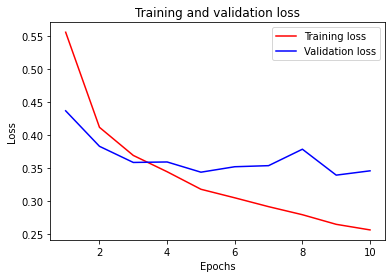

In [28]:
loss = history_hn.history['loss']
val_loss = history_hn.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()       

plt.show()

### 6주차 과제는 glorot_uniform었고 epoch 10에서 loss가 0.28정도였는데

### he_normal이 fashion_mnist에서 더 잘 학습되는 것을 알 수 있습니다.